<a href="https://colab.research.google.com/github/anniepeacock/DANSAR/blob/devel/nisar/Subsidence_NISAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# NISAR Application: Subsidence

### Corresponding Story Map: https://arcg.is/0PGi5f0
### NISAR Subsidence White Paper: https://tinyurl.com/4kemmnta

### I. How to create SAR quicklook images of subsidence?

* Useful Products: SAR interferometry (InSAR) is useful technique for detecting and monitoring subsidence. Useful products include InSAR phase and InSAR coherence. Sequences of SAR images for time series analysis are useful to measure subsidence rates over time.

* Useful Wavelengths: Longer wavelengths such as L-band and P-band are useful for monitoring subsidence over large areas because they can often penetrate vegetation and soil cover, providing information about subsurface deformation and generally retain higher coherence over time. However, shorter wavelengths such as C-band and X-band can also be useful for SAR monitoring due to their higher spatial resolution. While they may not penetrate as deeply into the ground, they can detect smaller-scale deformations, which can be more useful for smaller areas or regions with complex surface conditions.

* Instructions to View: view fringes of interferogram using a repeating color scale.

### II. How to interpret SAR images of subsidence?

Interpreting InSAR (Interferometric Synthetic Aperture Radar) images of subsidence involves analyzing the interferometric phase information to identify and quantify surface deformation associated with subsidence.

* InSAR Phase:
  * InSAR measures the phase difference between two SAR images acquired at different times. Changes in the interferometric phase represent changes in the distance between the SAR sensor and the ground surface along the radar line of sight (LOS).
  * Phase fringes in InSAR images represent changes in surface elevation or displacement.
  * Depending on fringe direction, fringes indicate areas that have moved closer to the radar sensor (i.e., subsidence) or indicate areas that have moved farther away from the radar sensor (i.e., uplift).

* Quantify Subsidence Magnitude:
  * Count the number of phase fringes to estimate the magnitude of subsidence. Each fringe corresponds to half the wavelength of the radar signal
  * Convert fringe counts to subsidence values by multiplying the number of fringes by half the wavelength.

* Validate with Ground Truth Data:
  * Validate InSAR-derived subsidence measurements with ground truth data, such as GPS surveys, leveling measurements, or historical records of subsidence.

* Temporal Analysis:
  * Analyze temporal sequences of InSAR images to track the evolution of subsidence over time.

* Integration with Other Data Sources:
  * Integrate InSAR data with other data sources, such as geological maps, land use/land cover data, and hydrological information, to contextualize subsidence observations and identify contributing factors.
  * Consider environmental factors such as land use, groundwater extraction, and soil properties, which can contribute to subsidence processes.

## SAR Examples

The content of this notebook is as follows:

1. [Running the Notebook](#s1)
2. [California Oil Fields](#s2)
3. [New Orleans Subsidence](#s3)
4. [Earthquake](#s4)
6. [References](#s6)


<a name="s1"></a>
## 1. Running the Notebook

- This Notebook has both "text" and "code" cells. The text cells have text descriptions about running the notebooks and data interpretation.
- Code cells are a light gray and a "play" button appears in the upper left corner when your mouse is hovered over the cell.
- To run the content in the code cells, **select the play button** in the upper left corner of each code cell or **press shift-enter**.

### Install Python Packages
This routine uses several python libaries. Some are already included in the Google Colab environment and others are installed and imported in the cell below. Downloading new python packages to this environment may take a few seconds to complete.

In [1]:
!pip install rasterio --quiet
!pip install geopandas --quiet

import rasterio as rio                      # Read and write geospatial raster data
from rasterio.plot import plotting_extent   # Returns plotting extent in format needed
import matplotlib.pyplot as plt             # Plotting, making graphs
import geopandas as gpd                     # Visualizing and importing geodata frames
import numpy as np                          # Numeric and mathematic functions
import math                                 # Access to mathematical functions
import getpass
import os
from osgeo import gdal
import glob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 23.7 MB/s eta 0:00:00


##### Install GDAL dependencies to Google Colab

In [2]:
!%%shell
!yes | add-apt-repository ppa:ubuntugis/ppa
!apt-get update
!apt-get install gdal-bin libgdal-dev
!C_INCLUDE_PATH=/usr/include/gdal CPLUS_INCLUDE_PATH=/usr/include/gdal python -m pip install GDAL=="$(gdal-config --version)"

/bin/bash: line 1: fg: no job control
PPA publishes dbgsym, you may need to include 'main/debug' component
Repository: 'deb https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu/ jammy main'
Description:
Official stable UbuntuGIS packages.


More info: https://launchpad.net/~ubuntugis/+archive/ubuntu/ppa
Adding repository.
Found existing deb entry in /etc/apt/sources.list.d/ubuntugis-ubuntu-ppa-jammy.list
Adding deb entry to /etc/apt/sources.list.d/ubuntugis-ubuntu-ppa-jammy.list
Found existing deb-src entry in /etc/apt/sources.list.d/ubuntugis-ubuntu-ppa-jammy.list
Adding disabled deb-src entry to /etc/apt/sources.list.d/ubuntugis-ubuntu-ppa-jammy.list
Adding key to /etc/apt/trusted.gpg.d/ubuntugis-ubuntu-ppa.gpg with fingerprint 6B827C12C2D425E227EDCA75089EBE08314DF160
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu ja

### Download the Data

Fetch UAVSAR geotiffs from the download links below with wget. The original UAVSAR data have been converted to cropped and subset geotiffs over the Station Fire perimeter.

A free Earthdata account is required to download the data! If needed, link to create Earthdata account: https://urs.earthdata.nasa.gov/users/new

In [ ]:
# Enter NASA's Earth data login
username = getpass.getpass(prompt='Earthdata username:')
password = getpass.getpass(prompt='Earthdata password:')

Earthdata username:··········
Earthdata password:··········


The UAVSAR files come in *.grd format. We need to generate ENVI HDR files to make them GIS-compatible and readable into this notebook. To do this, we will can clone and use the script below.

In [ ]:
# Clone the script to generate UAVSAR HDR files
# View script options with: !python3 "BuildUAVSARhdr.py/BuildUAVSARhdr.py" -h
!git clone https://bitbucket.org/nathanmthomas/bucket-of-rs-and-gis-scripts/src/master/BuildUAVSARhdr.py

Cloning into 'BuildUAVSARhdr.py'...
Receiving objects: 100% (229/229), 50.10 KiB | 6.26 MiB/s, done.
Resolving deltas: 100% (120/120), done.


We will use these functions and variables below throughout the notebook.

In [ ]:
## Define variables

# Define input directory and output directory
input_directory = './'  # Directory containing GRD and INC files
output_directory = './'  # Directory to save processed files

# Run the HDR script for all the GRD annd annotation files in the directory
int_polarization = 'INT'
unw_polarization = 'UNW'

## Define functions

# function to download files from Earthdata with wget
def download_files(files, username, password):
    for file in files:
        print(f'downloading {file}...')
        os.system(f"wget --user {username} --password {password} {file} --quiet")

## Function to process .int.grd Files
def process_int_files(input_dir, output_dir, filename_string, window, projection):
  """
  Function to take all the GRD files in the input directory and save as geotiffs.
  Can set new extents and projections for the output geotiff.
  """
  grd_files = [file for file in os.listdir(input_dir) if file.endswith('.int.grd') and file.startswith(filename_string)]
  for grd_file in grd_files:
    input_path = os.path.join(input_dir, grd_file)
    print(input_path)
    output_path = os.path.join(output_dir, grd_file.replace('.int.grd', '_int_clipped.tif'))
    print(output_path)
    gdal.Warp(output_path, input_path, format='GTiff', outputBounds=window, dstSRS=projection)

## Function to process .unw.grd Files
def process_unw_files(input_dir, output_dir, filename_string, window, projection):
  """
  Function to take all the GRD files in the input directory and save as geotiffs.
  Can set new extents and projections for the output geotiff.
  """
  grd_files = [file for file in os.listdir(input_dir) if file.endswith('.unw.grd') and file.startswith(filename_string)]
  for grd_file in grd_files:
    input_path = os.path.join(input_dir, grd_file)
    print(input_path)
    output_path = os.path.join(output_dir, grd_file.replace('.unw.grd', '_unw_clipped.tif'))
    print(output_path)
    gdal.Warp(output_path, input_path, format='GTiff', outputBounds=window, dstSRS=projection)

# 2. California Oil Fields

This sections plots a UAVSAR interferogram showing land subsidence within the Belridge oil fields in California.

SAR can be used to map subsidence in oil fields with its ability to detect minute changes in surface elevation over time. As oil is extracted from underground reservoirs, the ground above tends to gradually sink or subside, resulting in deformation visible in SAR images.

We will use UAVSAR data from this page in the next section:
https://uavsar.jpl.nasa.gov/cgi-bin/product.pl?jobName=SanAnd_23007_09084-010_10083-013_0401d_s01_L090_01#data

In [ ]:
# California Oil Fields, UAVSAR data files
files = ["https://uavsar.asf.alaska.edu/UA_SanAnd_23007_09084-010_10083-013_0401d_s01_L090_01/SanAnd_23007_09084-010_10083-013_0401d_s01_L090HH_01.ann",
         "https://uavsar.asf.alaska.edu/UA_SanAnd_23007_09084-010_10083-013_0401d_s01_L090_01/SanAnd_23007_09084-010_10083-013_0401d_s01_L090HH_01.int.grd",
         "https://uavsar.asf.alaska.edu/UA_SanAnd_23007_09084-010_10083-013_0401d_s01_L090_01/SanAnd_23007_09084-010_10083-013_0401d_s01_L090HH_01.unw.grd"]

# Call the function with your username and password to download the files
download_files(files, username, password)

downloading https://uavsar.asf.alaska.edu/UA_SanAnd_23007_09084-010_10083-013_0401d_s01_L090_01/SanAnd_23007_09084-010_10083-013_0401d_s01_L090HH_01.ann...
downloading https://uavsar.asf.alaska.edu/UA_SanAnd_23007_09084-010_10083-013_0401d_s01_L090_01/SanAnd_23007_09084-010_10083-013_0401d_s01_L090HH_01.int.grd...
downloading https://uavsar.asf.alaska.edu/UA_SanAnd_23007_09084-010_10083-013_0401d_s01_L090_01/SanAnd_23007_09084-010_10083-013_0401d_s01_L090HH_01.unw.grd...


In [ ]:
## Generate HDR fires for California Oil Field subsidence
annotation_file = 'SanAnd_23007_09084-010_10083-013_0401d_s01_L090HH_01.ann'
int_file = 'SanAnd_23007_09084-010_10083-013_0401d_s01_L090HH_01.int.grd'
unw_file = 'SanAnd_23007_09084-010_10083-013_0401d_s01_L090HH_01.unw.grd'

!python3 "BuildUAVSARhdr.py/BuildUAVSARhdr.py" -i {annotation_file} -r {int_file} -p {int_polarization}
!python3 "BuildUAVSARhdr.py/BuildUAVSARhdr.py" -i {annotation_file} -r {unw_file} -p {unw_polarization}

UAVSAR.py is written by Nathan Thomas (nmthomas28@gmail.com, @DrNASApants)  formerly of the Aberystwyth University Earth Observation and Ecosystems Dynamics Laboratory (@AU_EarthObs) as part of a visiting research program at NASA JPL. Ammended to process UAVSAR InSAR pair data by Yang Zheng (April 2015).
Use '-h' for help and required input parameters

UPPER LEFT LAT =  35.65563000
UPPER LEFT LONG =  -120.61042584
SAMPLES = 15416
Lines = 19578
PIXEL SIZE =  5.556e-05
DATATYPE =  6
SanAnd_23007_09084-010_10083-013_0401d_s01_L090HH_01.int.grd.hdr
Writing output HDR file...
Output HDR file = SanAnd_23007_09084-010_10083-013_0401d_s01_L090HH_01.int.grd.hdr

Thank you for using UAVSAR.py

UAVSAR.py is written by Nathan Thomas (nmthomas28@gmail.com, @DrNASApants)  formerly of the Aberystwyth University Earth Observation and Ecosystems Dynamics Laboratory (@AU_EarthObs) as part of a visiting research program at NASA JPL. Ammended to process UAVSAR InSAR pair data by Yang Zheng (April 2015).
U

Now, we will crop the UAVSAR data so we can look at a smaller subset where subsidence is occurring.

In [ ]:
# Define extent and projection details
upper_left_x = -119.884 #xmin
upper_left_y = 35.564 #ymind
lower_right_x = -119.587
lower_right_y = 35.395
window = (upper_left_x, upper_left_y, lower_right_x, lower_right_y)
projection = 'EPSG:4326'

In [ ]:
# Process int files
process_int_files(input_directory, output_directory, 'SanAnd_23007', window, projection)

# Process unw files
process_unw_files(input_directory, output_directory, 'SanAnd_23007', window, projection)

./SanAnd_23007_09084-010_10083-013_0401d_s01_L090HH_01.int.grd
./SanAnd_23007_09084-010_10083-013_0401d_s01_L090HH_01_int_clipped.tif
./SanAnd_23007_09084-010_10083-013_0401d_s01_L090HH_01.unw.grd
./SanAnd_23007_09084-010_10083-013_0401d_s01_L090HH_01_unw_clipped.tif


Now we can read in our GIS-compatible and cropped interferogram.

In [ ]:
# Read in newly generated interferogram geotiff
grd_int = rio.open('SanAnd_23007_09084-010_10083-013_0401d_s01_L090HH_01_int_clipped.tif')
grd_int = grd_int.read(1)
grd_int[grd_int == 0] = np.nan #set 0 to nan
print(np.nanmin(grd_int), 'interferogram min value')
print(np.nanmax(grd_int), 'interferogram max value')

magnitude = np.abs(grd_int)
phase = np.angle(grd_int)
print(np.nanmin(magnitude), 'magnitude min value')
print(np.nanmax(magnitude), 'magnitude max value')

print(np.nanmin(phase), 'phase min value')
print(np.nanmax(phase), 'phase max value')

(-4.9592204+0.67435956j) interferogram min value
(4.316325+3.4799514j) interferogram max value
2.501534e-10 magnitude min value
65.33985 magnitude max value
-3.1415925 phase min value
3.141592 phase max value


Now, we will plot the wrapped interferogram.

The wrapped interferogram displays the phase differences between two SAR acquisitions. These phase differences are constrained to a 2π scale, equivalent to one-half of the wavelength of the SAR sensor.

The wrapped interferogram is most often visualized with a repeating color ramp, so that we can see each pass through the color ramp as a "fringe". Each fringe  is equivalent to a displacement of one-half of the SAR sensor's wavelength in the line of sight of the sensor.

Over different parts of the oil field, we can count 1 to 2 fringers in the wrapped interferogram below.

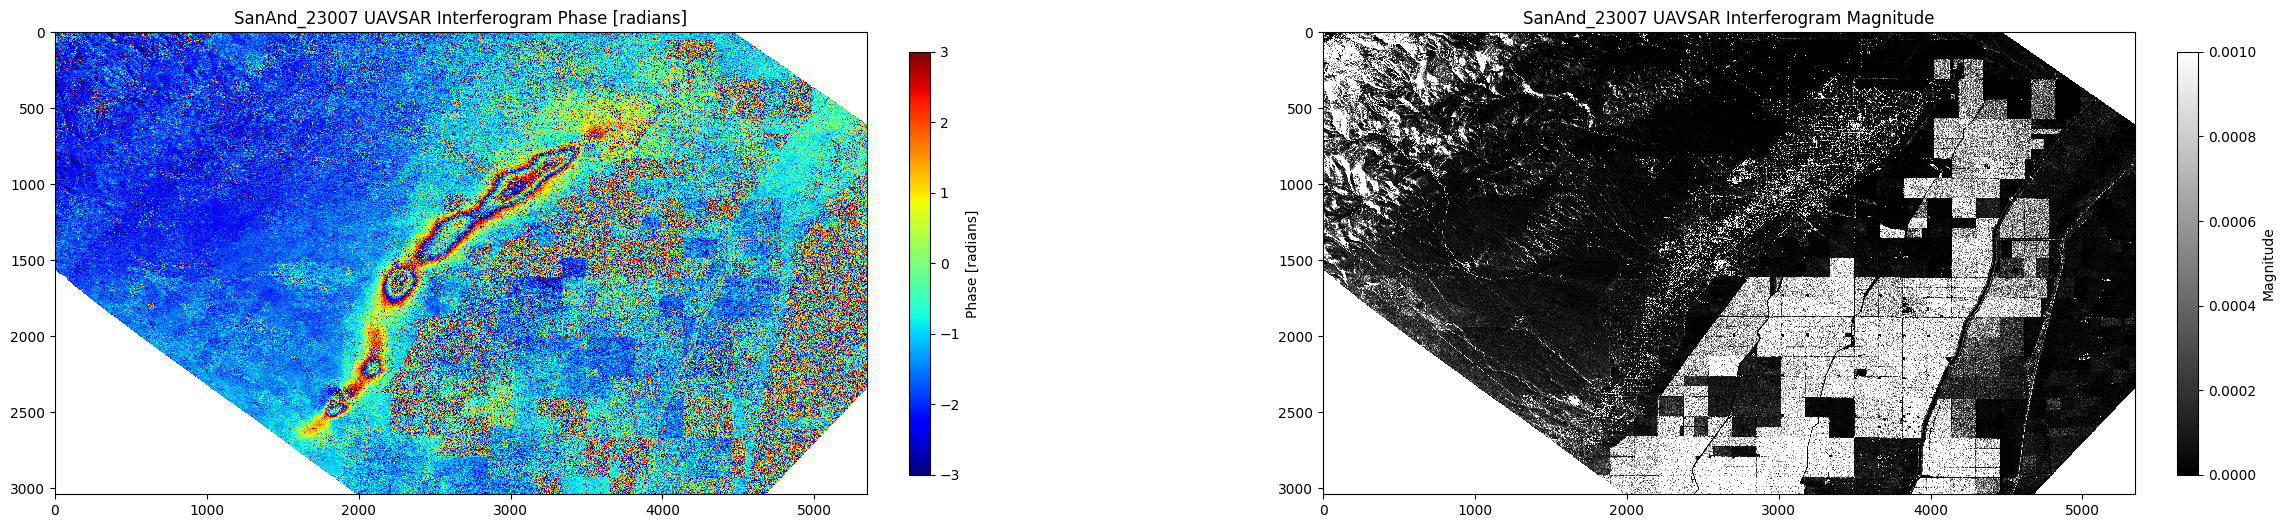

In [ ]:
plt.figure(figsize=(30,6))

# Plot phase
plt.subplot(1, 2, 1)
plt.imshow(phase, interpolation='nearest',vmin=-3, vmax=3, cmap='jet')
plt.title('SanAnd_23007 UAVSAR Interferogram Phase [radians]')
plt.colorbar(label='Phase [radians]', fraction=0.02, pad=0.04)

# Plot magnitude
plt.subplot(1, 2, 2)
plt.imshow(magnitude, interpolation='nearest', vmin=0, vmax=0.001, cmap='gray')
plt.title('SanAnd_23007 UAVSAR Interferogram Magnitude')
plt.colorbar(label='Magnitude', fraction=0.02, pad=0.04)
plt.show()

Now, we will plot the unwrapped interferogram.

Phase unwrapping algorithms help convert these fringes to line-of-sight displacement.



In [ ]:
# Read in newly generated unwrapped interferogram geotiff
grd_unw = rio.open('SanAnd_23007_09084-010_10083-013_0401d_s01_L090HH_01_unw_clipped.tif')
grd_unw = grd_unw.read(1)
grd_unw[grd_unw == 0] = np.nan #set 0 to nan
print(np.nanmin(grd_unw), 'unwrapped int min value')
print(np.nanmax(grd_unw), 'unwrapped int max value')

-10.024221 unwrapped int min value
17.17127 unwrapped int max value


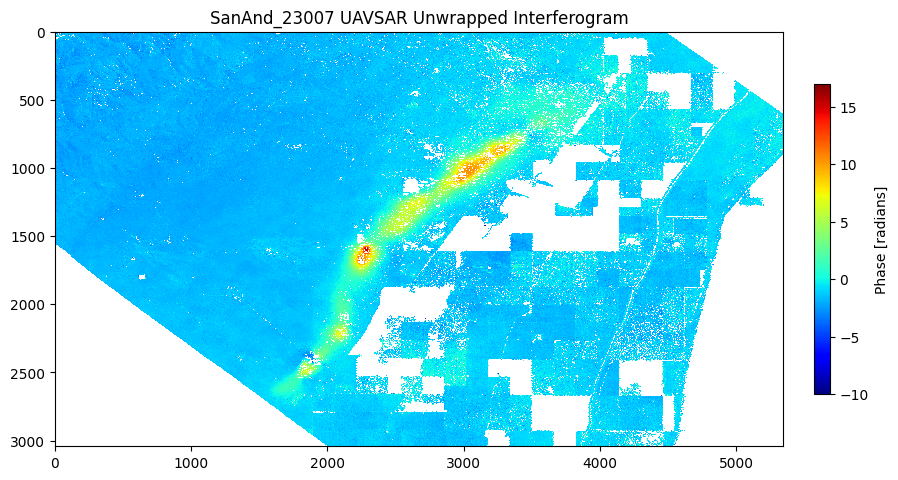

In [ ]:
plt.figure(figsize=(10,6))
plt.imshow(grd_unw, interpolation='nearest',vmin=-10, vmax=17, cmap='jet')
plt.title('SanAnd_23007 UAVSAR Unwrapped Interferogram')
plt.colorbar(label='Phase [radians]', fraction=0.02, pad=0.04)
plt.show()

Convert to line of sight displacement from the unwrapped phase values.

The direction of displacement is relative to the radar sensor's line of sight.

* **Positive** line of sight displacement (LOS) typically indicates movement **away** from UAVSAR, or increase in distance between the radar and the ground. In this instance, the ground may be subsiding away from the radar.
* **Negative** line of sight displacement typically indicates movement **towards** UAVSAR, or decrease in distance between the radar and the ground.


In [ ]:
phase = grd_unw
wavelength = 25 #in cm
los_displacement = phase * (wavelength / (4 * np.pi))

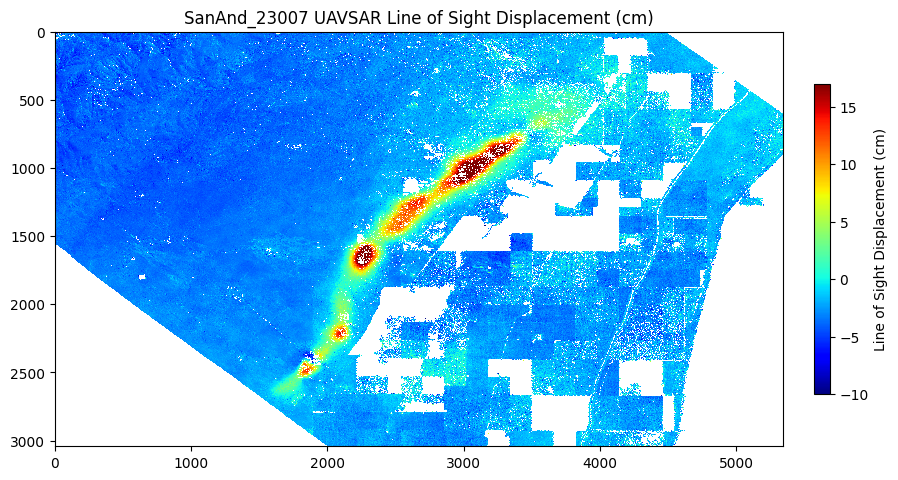

In [ ]:
plt.figure(figsize=(10,6))
plt.imshow(los_displacement, interpolation='nearest', vmin=-10, vmax=17, cmap='jet')
plt.title('SanAnd_23007 UAVSAR Line of Sight Displacement (cm)')
plt.colorbar(label='Line of Sight Displacement (cm)', fraction=0.02, pad=0.04)
plt.show()

# 3. New Orleans Subsidence

These UAVSAR interferograms detect land subsidence in New Orleans, LA. This coastal delta lies atop drained swamp and marshes, protected by manmade and natural levees. Modern subsidence is driven by natural processes such as sediment compaction, and anthropogenic processes such as oil/gas fluid extraction.

UAVSAR Data Line: https://uavsar.jpl.nasa.gov/cgi-bin/product.pl?jobName=gulfco_09010_09044-002_12053-006_1112d_s01_L090_02#data
Reference: https://agupubs.onlinelibrary.wiley.com/doi/pdf/10.1002/2015JB012636

Levee System Map: https://levees.sec.usace.army.mil/map-viewer/index.html?x=-90.208&y=29.97&z=12

In [ ]:
# New Orleans Subsidence, UAVSAR data
files = ["https://uavsar.asfdaac.alaska.edu/UA_gulfco_09010_09044-002_09067-000_0079d_s01_L090_02/gulfco_09010_09044-002_09067-000_0079d_s01_L090HH_02.ann",
         "https://uavsar.asfdaac.alaska.edu/UA_gulfco_09010_09044-002_09067-000_0079d_s01_L090_02/gulfco_09010_09044-002_09067-000_0079d_s01_L090HH_02.int.grd",
         "https://uavsar.asfdaac.alaska.edu/UA_gulfco_09010_09044-002_09067-000_0079d_s01_L090_02/gulfco_09010_09044-002_09067-000_0079d_s01_L090HH_02.unw.grd"]

# Call the function with your username and password
download_files(files, username, password)

downloading https://uavsar.asfdaac.alaska.edu/UA_gulfco_09010_09044-002_09067-000_0079d_s01_L090_02/gulfco_09010_09044-002_09067-000_0079d_s01_L090HH_02.ann...
downloading https://uavsar.asfdaac.alaska.edu/UA_gulfco_09010_09044-002_09067-000_0079d_s01_L090_02/gulfco_09010_09044-002_09067-000_0079d_s01_L090HH_02.int.grd...
downloading https://uavsar.asfdaac.alaska.edu/UA_gulfco_09010_09044-002_09067-000_0079d_s01_L090_02/gulfco_09010_09044-002_09067-000_0079d_s01_L090HH_02.unw.grd...


In [ ]:
## Generate HDR fires for New Orleans subsidence
annotation_file = 'gulfco_09010_09044-002_09067-000_0079d_s01_L090HH_02.ann'
int_file = 'gulfco_09010_09044-002_09067-000_0079d_s01_L090HH_02.int.grd'
unw_file = 'gulfco_09010_09044-002_09067-000_0079d_s01_L090HH_02.unw.grd'

!python3 "BuildUAVSARhdr.py/BuildUAVSARhdr.py" -i {annotation_file} -r {int_file} -p {int_polarization}
!python3 "BuildUAVSARhdr.py/BuildUAVSARhdr.py" -i {annotation_file} -r {unw_file} -p {unw_polarization}

In [ ]:
# Define extent and projection details
upper_left_x = -90.5825 #xmin
upper_left_y = 30.073333 #ymind
lower_right_x = -89.745278
lower_right_y = 29.891667
window = (upper_left_x, upper_left_y, lower_right_x, lower_right_y)
projection = 'EPSG:4326'

In [ ]:
# Process int files
process_int_files(input_directory, output_directory, 'gulfco_09010', window, projection)

# Process unw files
process_unw_files(input_directory, output_directory, 'gulfco_09010', window, projection)

./gulfco_09010_09044-002_09067-000_0079d_s01_L090HH_02.int.grd
./gulfco_09010_09044-002_09067-000_0079d_s01_L090HH_02_int_clipped.tif
./gulfco_09010_09044-002_09067-000_0079d_s01_L090HH_02.unw.grd
./gulfco_09010_09044-002_09067-000_0079d_s01_L090HH_02_unw_clipped.tif


In [ ]:
# Read in newly generated interferogram geotiff
grd_int = rio.open('gulfco_09010_09044-002_09067-000_0079d_s01_L090HH_02_int_clipped.tif')
grd_int = grd_int.read(1)
grd_int[grd_int == 0] = np.nan #set 0 to nan
print(np.nanmin(grd_int), 'interferogram min value')
print(np.nanmax(grd_int), 'interferogram max value')

magnitude = np.abs(grd_int)
phase = np.angle(grd_int)
print(np.nanmin(magnitude), 'magnitude min value')
print(np.nanmax(magnitude), 'magnitude max value')

print(np.nanmin(phase), 'phase min value')
print(np.nanmax(phase), 'phase max value')

(-9368.279+7248.2754j) interferogram min value
(7019.9785-2935.3071j) interferogram max value
2.9060146e-07 magnitude min value
39372.055 magnitude max value
-3.1415915 phase min value
3.1415923 phase max value


Plot wrapped interferogram

The wrapped interferogram displays the phase differences between two SAR acquisitions. These phase differences are constrained to a 2π scale, equivalent to one-half of the wavelength of the SAR sensor.

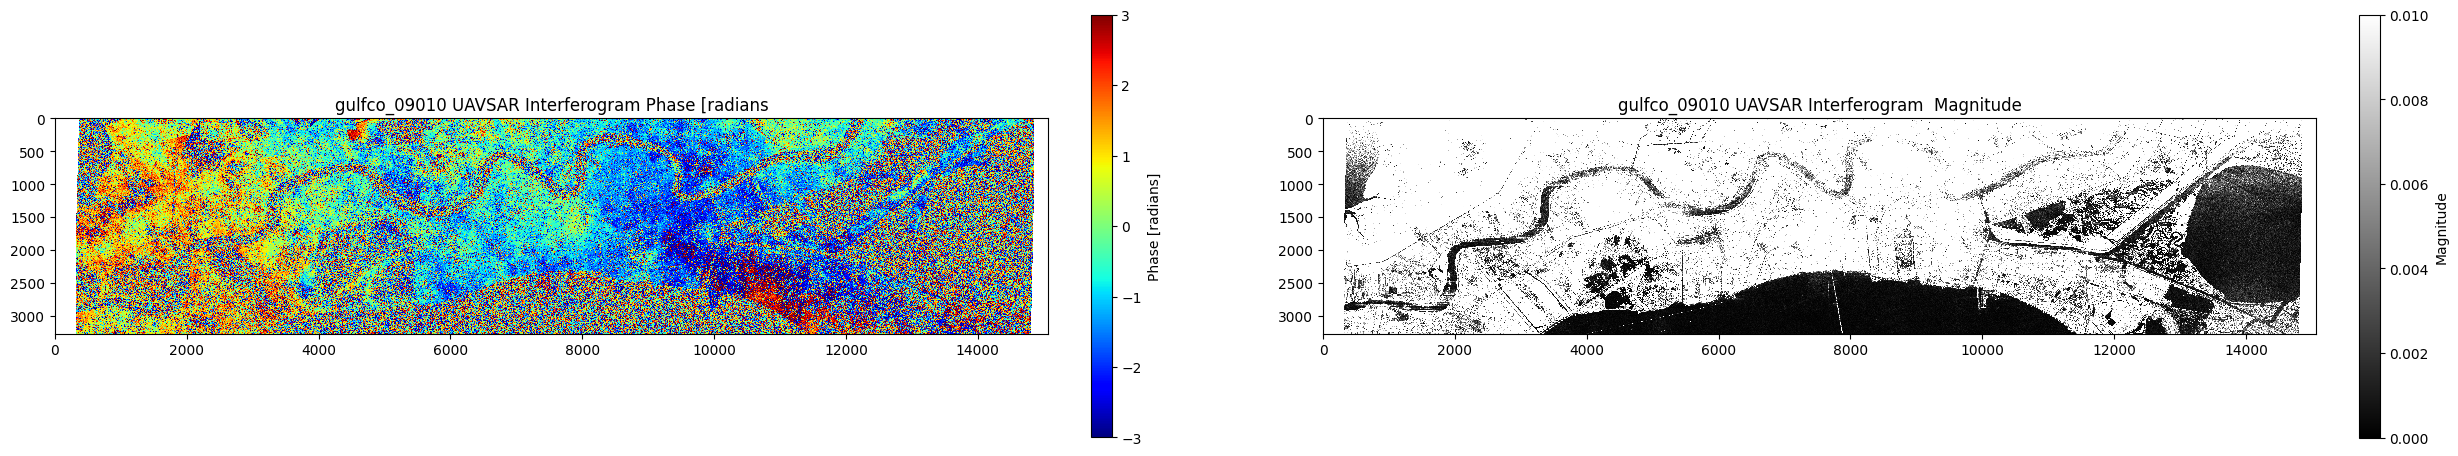

In [ ]:
plt.figure(figsize=(30,6))

# Plot phase
plt.subplot(1, 2, 1)
plt.imshow(phase, interpolation='nearest',vmin=-3, vmax=3, cmap='jet')
plt.title('gulfco_09010 UAVSAR Interferogram Phase [radians]')
plt.colorbar(label='Phase [radians]', fraction=0.02, pad=0.04)

# Plot magnitude
plt.subplot(1, 2, 2)
plt.imshow(magnitude, interpolation='nearest', vmin=0, vmax=0.01, cmap='gray')
plt.title('gulfco_09010 UAVSAR Interferogram  Magnitude')
plt.colorbar(label='Magnitude', fraction=0.02, pad=0.04)
plt.show()

Plot unwrapped interferogram

In [ ]:
# Read in newly generated unwrapped interferogram geotiff
grd_unw = rio.open('gulfco_09010_09044-002_09067-000_0079d_s01_L090HH_02_unw_clipped.tif')
grd_unw = grd_unw.read(1)
grd_unw[grd_unw == 0] = np.nan #set 0 to nan
print(np.nanmin(grd_unw), 'unwrapped int min value')
print(np.nanmax(grd_unw), 'unwrapped int max value')

-27.971575 unwrapped int min value
25.436583 unwrapped int max value


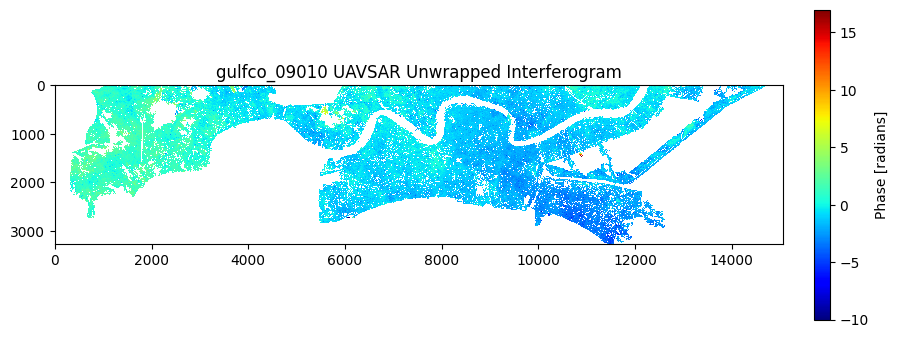

In [ ]:
plt.figure(figsize=(10,6))
plt.imshow(grd_unw, interpolation='nearest', vmin=-10, vmax=17, cmap='jet')
plt.title('gulfco_09010 UAVSAR Unwrapped Interferogram')
plt.colorbar(label='Phase [radians]', fraction=0.02, pad=0.04)
plt.show()

Convert to line of sight displacement.

The direction of displacement is relative to the radar sensor's line of sight.

* **Positive** line of sight displacement (LOS) typically indicates movement **away** from UAVSAR, or increase in distance between the radar and the ground. In this instance, the ground may be subsiding away from the radar.
* **Negative** line of sight displacement typically indicates movement **towards** UAVSAR, or decrease in distance between the radar and the ground.



In [ ]:
phase = grd_unw
wavelength = 25 #in cm
los_displacement = phase * (wavelength / (4 * np.pi))

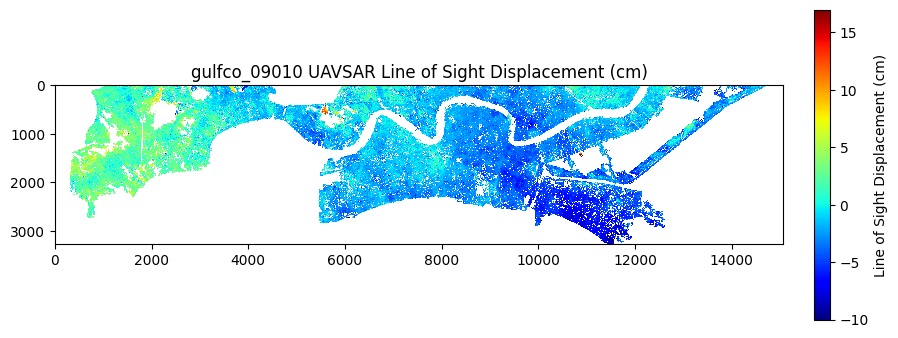

In [ ]:
plt.figure(figsize=(10,6))
plt.imshow(los_displacement, interpolation='nearest', vmin=-10, vmax=17, cmap='jet')
plt.title('gulfco_09010 UAVSAR Line of Sight Displacement (cm)')
plt.colorbar(label='Line of Sight Displacement (cm)', fraction=0.02, pad=0.04)
plt.show()

# 4. Baja California Earthquake
UAVSAR Data Line: https://uavsar.jpl.nasa.gov/cgi-bin/product.pl?jobName=SanAnd_26501_09083-010_10028-000_0174d_s01_L090_03#data

Reference: https://agupubs.onlinelibrary.wiley.com/doi/10.1002/2013GC005120

Fault lines layer:

In [ ]:
# Baja Earthquake, UAVSAR data
files = ["https://uavsar.asf.alaska.edu/UA_SanAnd_26501_09083-010_10028-000_0174d_s01_L090_03/SanAnd_26501_09083-010_10028-000_0174d_s01_L090HH_03.int.grd",
         "https://uavsar.asf.alaska.edu/UA_SanAnd_26501_09083-010_10028-000_0174d_s01_L090_03/SanAnd_26501_09083-010_10028-000_0174d_s01_L090HH_03.unw.grd",
         "https://uavsar.asf.alaska.edu/UA_SanAnd_26501_09083-010_10028-000_0174d_s01_L090_03/SanAnd_26501_09083-010_10028-000_0174d_s01_L090HH_03.ann"]

# Call the function with your username and password
download_files(files, username, password)

downloading https://uavsar.asf.alaska.edu/UA_SanAnd_26501_09083-010_10028-000_0174d_s01_L090_03/SanAnd_26501_09083-010_10028-000_0174d_s01_L090HH_03.int.grd...
downloading https://uavsar.asf.alaska.edu/UA_SanAnd_26501_09083-010_10028-000_0174d_s01_L090_03/SanAnd_26501_09083-010_10028-000_0174d_s01_L090HH_03.unw.grd...
downloading https://uavsar.asf.alaska.edu/UA_SanAnd_26501_09083-010_10028-000_0174d_s01_L090_03/SanAnd_26501_09083-010_10028-000_0174d_s01_L090HH_03.ann...


In [ ]:
## Generate HDR fires for Baja California earthquake data
annotation_file = 'SanAnd_26501_09083-010_10028-000_0174d_s01_L090HH_03.ann'
int_file = 'SanAnd_26501_09083-010_10028-000_0174d_s01_L090HH_03.int.grd'
unw_file = 'SanAnd_26501_09083-010_10028-000_0174d_s01_L090HH_03.unw.grd'

!python3 "BuildUAVSARhdr.py/BuildUAVSARhdr.py" -i {annotation_file} -r {int_file} -p {int_polarization}
!python3 "BuildUAVSARhdr.py/BuildUAVSARhdr.py" -i {annotation_file} -r {unw_file} -p {unw_polarization}

UAVSAR.py is written by Nathan Thomas (nmthomas28@gmail.com, @DrNASApants)  formerly of the Aberystwyth University Earth Observation and Ecosystems Dynamics Laboratory (@AU_EarthObs) as part of a visiting research program at NASA JPL. Ammended to process UAVSAR InSAR pair data by Yang Zheng (April 2015).
Use '-h' for help and required input parameters

UPPER LEFT LAT =  32.942857440000004
UPPER LEFT LONG =  -116.152902600000004
SAMPLES = 6562
Lines = 22273
PIXEL SIZE =  5.556e-05
DATATYPE =  6
SanAnd_26501_09083-010_10028-000_0174d_s01_L090HH_03.int.grd.hdr
Writing output HDR file...
Output HDR file = SanAnd_26501_09083-010_10028-000_0174d_s01_L090HH_03.int.grd.hdr

Thank you for using UAVSAR.py

UAVSAR.py is written by Nathan Thomas (nmthomas28@gmail.com, @DrNASApants)  formerly of the Aberystwyth University Earth Observation and Ecosystems Dynamics Laboratory (@AU_EarthObs) as part of a visiting research program at NASA JPL. Ammended to process UAVSAR InSAR pair data by Yang Zheng (A

In [ ]:
# Define extent and projection details
upper_left_x = -116.140833 #xmin
upper_left_y = 32.806667 #ymind
lower_right_x = -115.370278
lower_right_y = 32.689167
window = (upper_left_x, upper_left_y, lower_right_x, lower_right_y)
projection = 'EPSG:4326'

In [ ]:
# Process int files
process_int_files(input_directory, output_directory, 'SanAnd_26501', window, projection)

# Process unw files
process_unw_files(input_directory, output_directory, 'SanAnd_26501', window, projection)

./SanAnd_26501_09083-010_10028-000_0174d_s01_L090HH_03.int.grd
./SanAnd_26501_09083-010_10028-000_0174d_s01_L090HH_03_int_clipped.tif
./SanAnd_26501_09083-010_10028-000_0174d_s01_L090HH_03.unw.grd
./SanAnd_26501_09083-010_10028-000_0174d_s01_L090HH_03_unw_clipped.tif


In [ ]:
# Read in newly generated interferogram geotiff
grd_int = rio.open('SanAnd_26501_09083-010_10028-000_0174d_s01_L090HH_03_int_clipped.tif')
grd_int = grd_int.read(1)
grd_int[grd_int == 0] = np.nan #set 0 to nan
print(np.nanmin(grd_int), 'interferogram min value')
print(np.nanmax(grd_int), 'interferogram max value')

magnitude = np.abs(grd_int)
phase = np.angle(grd_int)
print(np.nanmin(magnitude), 'magnitude min value')
print(np.nanmax(magnitude), 'magnitude max value')

print(np.nanmin(phase), 'phase min value')
print(np.nanmax(phase), 'phase max value')

(-1689.886-1307.8474j) interferogram min value
(1506.7739+613.3271j) interferogram max value
9.481135e-07 magnitude min value
2136.862 magnitude max value
-3.1415923 phase min value
3.1415925 phase max value


Plot wrapped interferogram

The wrapped interferogram displays the phase differences between two SAR acquisitions. These phase differences are constrained to a 2π scale, equivalent to one-half of the wavelength of the SAR sensor.

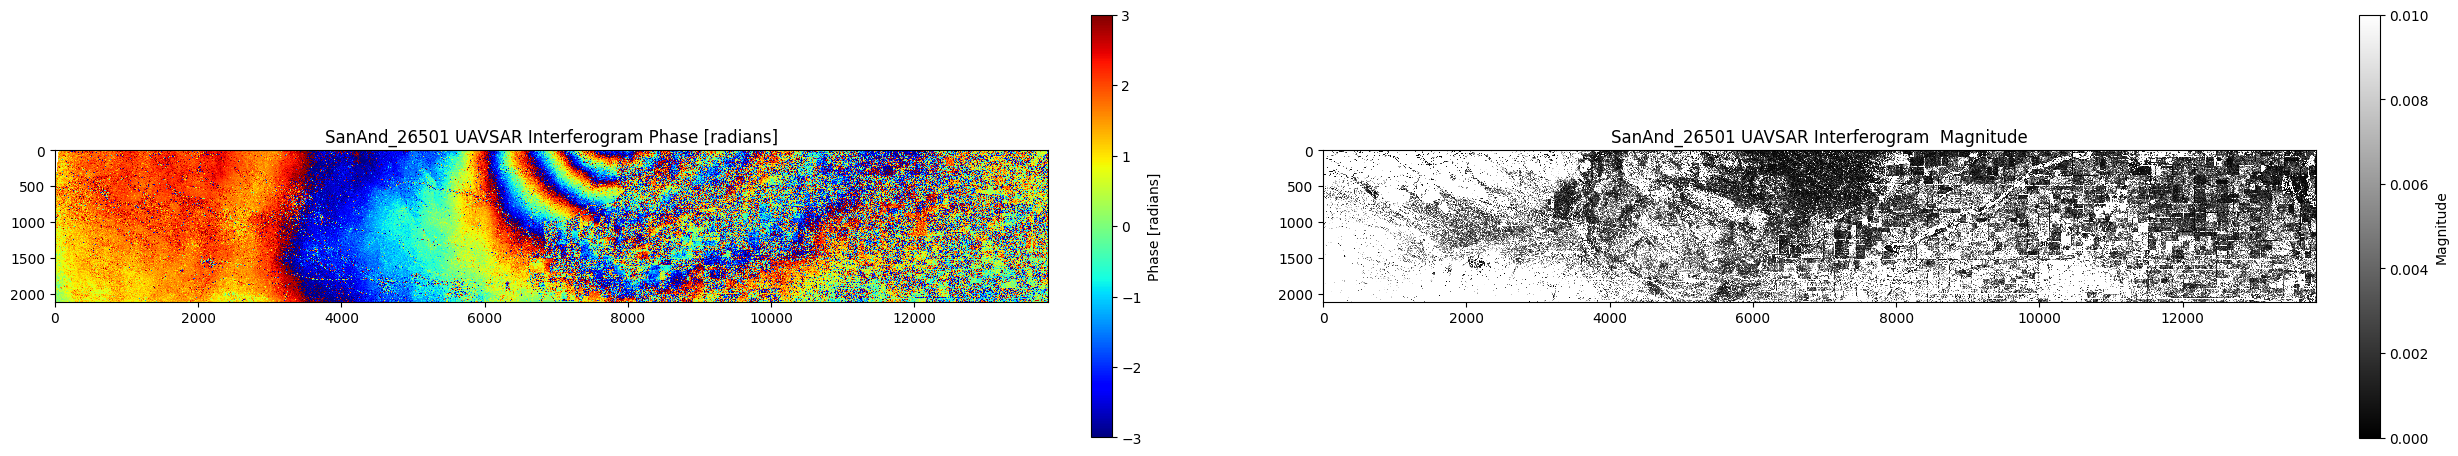

In [ ]:
plt.figure(figsize=(30,6))

# Plot phase
plt.subplot(1, 2, 1)
plt.imshow(phase, interpolation='nearest',vmin=-3, vmax=3, cmap='jet')
plt.title('SanAnd_26501 UAVSAR Interferogram Phase [radians]')
plt.colorbar(label='Phase [radians]', fraction=0.02, pad=0.04)

# Plot magnitude
plt.subplot(1, 2, 2)
plt.imshow(magnitude, interpolation='nearest', vmin=0, vmax=0.01, cmap='gray')
plt.title('SanAnd_26501 UAVSAR Interferogram  Magnitude')
plt.colorbar(label='Magnitude', fraction=0.02, pad=0.04)
plt.show()

In [ ]:
grd_unw = rio.open('SanAnd_26501_09083-010_10028-000_0174d_s01_L090HH_03_unw_clipped.tif')
grd_unw = grd_unw.read(1)
grd_unw[grd_unw == 0] = np.nan #set 0 to nan
print(np.nanmin(grd_unw), 'unwrapped int min value')
print(np.nanmax(grd_unw), 'unwrapped int max value')

-13.921854 unwrapped int min value
21.32417 unwrapped int max value


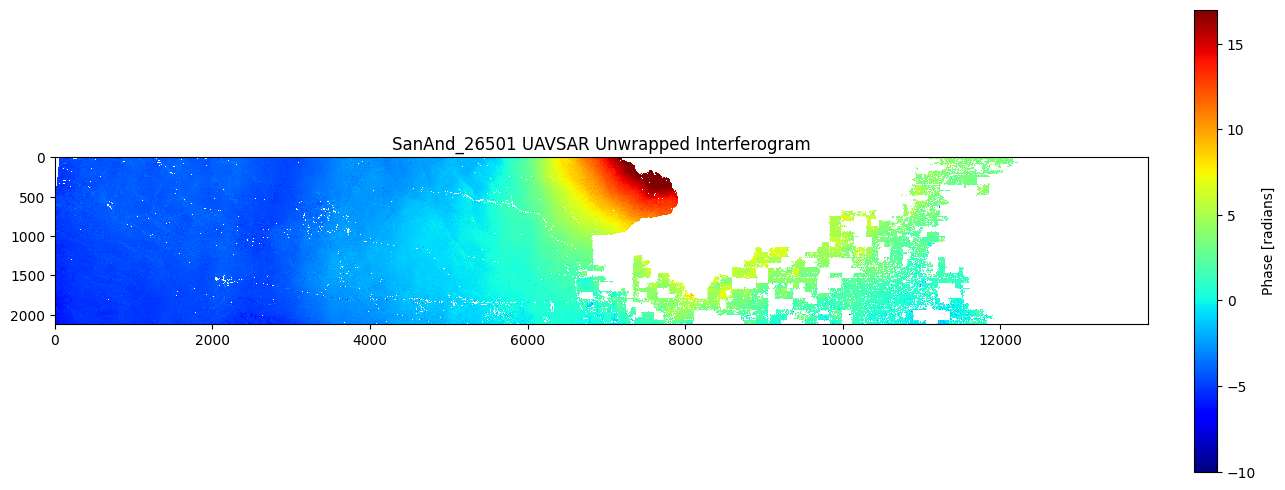

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(grd_unw, interpolation='nearest',vmin=-10, vmax=17, cmap='jet')
plt.title('SanAnd_26501 UAVSAR Unwrapped Interferogram')
plt.colorbar(label='Phase [radians]', fraction=0.02, pad=0.04)
plt.show()

Convert to line of sight displacement.

The direction of displacement is relative to the radar sensor's line of sight.

* **Positive** line of sight displacement (LOS) typically indicates movement **away** from UAVSAR, or increase in distance between the radar and the ground. In this instance, the ground may be subsiding away from the radar.
* **Negative** line of sight displacement typically indicates movement **towards** UAVSAR, or decrease in distance between the radar and the ground.

In [ ]:
phase = grd_unw
wavelength = 25 #in cm
los_displacement = phase * (wavelength / (4 * np.pi))

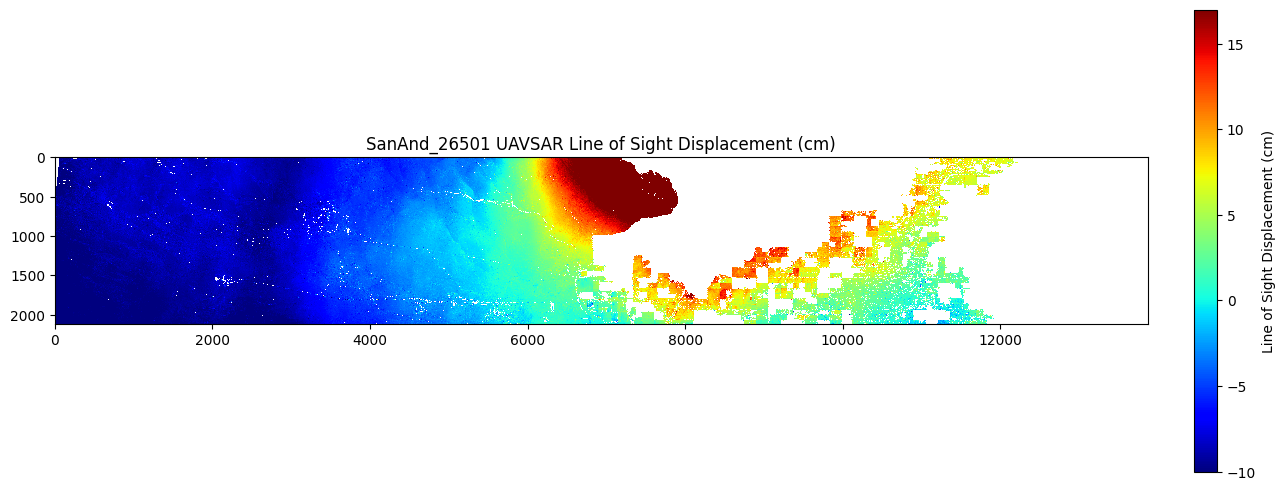

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(los_displacement, interpolation='nearest',vmin=-10, vmax=17, cmap='jet')
plt.title('SanAnd_26501 UAVSAR Line of Sight Displacement (cm)')
plt.colorbar(label='Line of Sight Displacement (cm)', fraction=0.02, pad=0.04)
plt.show()

## Other Resources

UAVSAR Data Download: https://uavsar.jpl.nasa.gov/cgi-bin/data.p

## References



1. Fielding, E. J., Blom, R. G., & Goldstein, R. M. (1998). Rapid subsidence over oil fields measured by SAR interferometry. Geophysical Research Letters, 25(17), 3215–3218. https://doi.org/10.1029/98gl52260
2. Jones, C. E., An, K., Blom, R. G., Kent, J. D., Ivins, E. R., &amp; Bekaert, D. (2016). Anthropogenic and geologic influences on subsidence in the vicinity of New Orleans, Louisiana. Journal of Geophysical Research: Solid Earth, 121(5), 3867–3887. https://doi.org/10.1002/2015jb012636
3. InSAR Tutorial: https://storymaps.arcgis.com/stories/8be186e4125741518118d0102e6835e5


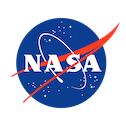

The research was carried out at the Jet Propulsion Laboratory, California Institute of Technology, under a contract with the National Aeronautics and Space Administration (80NM0018D0004)

© 2024. California Institute of Technology. Government sponsorship acknowledged.